# Graphs

# Document

<table align="left">
    <tr>
        <th class="text-align:left">Title</th>
        <td class="text-align:left">Create graphs</td>
    </tr>
    <tr>
        <th class="text-align:left">Last modified</th>
        <td class="text-align:left">2019-01-07</td>
    </tr>
    <tr>
        <th class="text-align:left">Author</th>
        <td class="text-align:left">Gilles Pilon <gillespilon13@gmail.com></td>
    </tr>
    <tr>
        <th class="text-align:left">Status</th>
        <td class="text-align:left">Active</td>
    </tr>
    <tr>
        <th class="text-align:left">Type</th>
        <td class="text-align:left">Jupyter notebook</td>
    </tr>
    <tr>
        <th class="text-align:left">Created</th>
        <td class="text-align:left">2018-12-21</td>
    </tr>
    <tr>
        <th class="text-align:left">File name</th>
        <td class="text-align:left">N/A</td>
    </tr>
    <tr>
        <th class="text-align:left">Other files required</th>
        <td class="text-align:left">N/A</td>
    </tr>
</table>

# Ideas

- Box and whisker plot.
- Line plot.
- Scatter plot.
- Histogram.
- Normal probability plot.
- X and mR charts.

In [1]:
# Read a csv file.
import pandas as pd
df = pd.read_csv('cloquet_two_weeks_60_min.csv',
                 parse_dates=True,
                 index_col='Time')

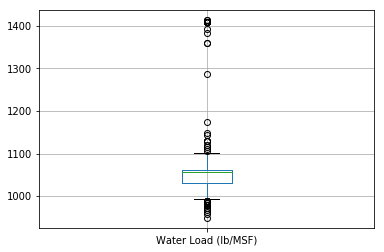

In [2]:
# Create a box and whisker plot.
%matplotlib inline
ax = df.boxplot(column='Water Load (lb/MSF)')

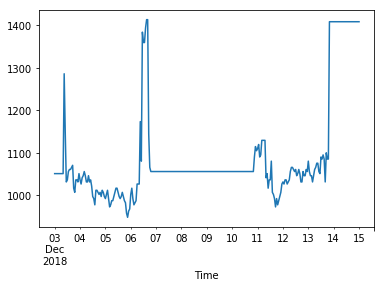

In [3]:
# Create a line plot.
ax = df.plot.line(y='Water Load (lb/MSF)',
                  legend=False)

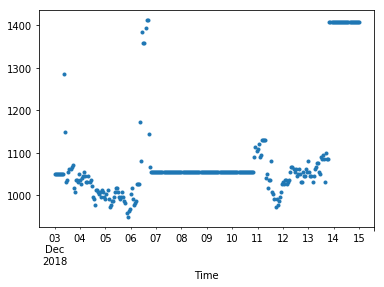

In [4]:
# Create a scatter plot.
ax = df.plot.line(y='Water Load (lb/MSF)',
                  legend=False,
                  style='.')

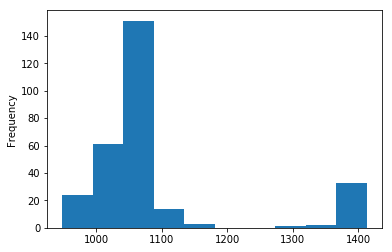

In [5]:
# Create a histogram.
ax = df.plot.hist(y='Water Load (lb/MSF)',
                  legend=False)

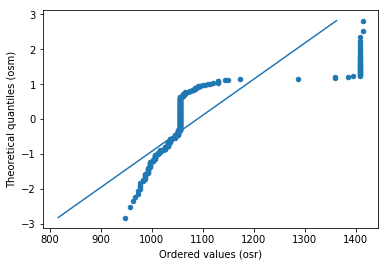

In [6]:
# Create a normal probability plot.
from scipy import stats
(osm, osr), (slope, intercept, r) = stats.probplot(df['Water Load (lb/MSF)'], fit=True)
dfnpp = pd.DataFrame.from_dict({'Theoretical quantiles (osm)': osm,
                                'Ordered values (osr)': osr})
ax = dfnpp.plot.scatter('Ordered values (osr)',
                        'Theoretical quantiles (osm)')
ax.plot(slope * osm + intercept, osm)

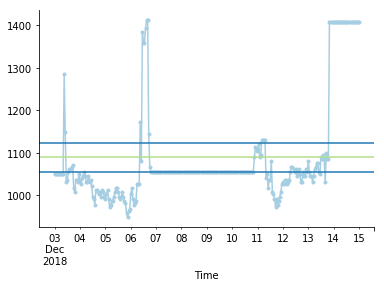

In [7]:
# Create XmR control charts using the datasense package.
import datasense as ds
x = ds.X(df['Water Load (lb/MSF)'].to_frame())
ax3 =x.ax